In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_df = pd.read_csv('TRAINING_.csv')

In [4]:
test_df = pd.read_csv('TEST_.csv')

In [5]:
submission_df = pd.read_csv('SAMPLE_.csv')

In [6]:
train_df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,306,8.0,2.0,1.0,3.0,NaN,NaN,78.0,1,73.0,5,D,3717$
6996,6997,341,5.0,3.0,2.0,4.0,YES,100.0,72.0,4,76.0,4,D,3339$
6997,6998,306,6.0,4.0,2.0,4.0,yes,83.0,80.0,4,96.0,4,D,3829$
6998,6999,338,8.0,7.0,6.0,7.0,NO,0.0,95.0,4,84.0,1,B,4488$


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        6998 non-null   float64
 3   Nbedrooms    6997 non-null   float64
 4   Nbwashrooms  6998 non-null   float64
 5   Twashrooms   6999 non-null   float64
 6   roof         5647 non-null   object 
 7   Roof(Area)   5647 non-null   float64
 8   Lawn(Area)   6998 non-null   float64
 9   Nfloors      7000 non-null   int64  
 10  API          6999 non-null   float64
 11  ANB          7000 non-null   int64  
 12  Grade        7000 non-null   object 
 13  EXPECTED     7000 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 765.8+ KB


In [8]:
train_df.isnull().sum()

id                0
Area(total)       0
Troom             2
Nbedrooms         3
Nbwashrooms       2
Twashrooms        1
roof           1353
Roof(Area)     1353
Lawn(Area)        2
Nfloors           0
API               1
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [9]:
test_df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,NaN,NaN,100.0,5,89.0,4,3858$
3295,3296,338,7.0,3.0,2.0,4,NO,0.0,87.0,3,75.0,6,3714$
3296,3297,307,8.0,4.0,5.0,6,yes,88.0,88.0,4,83.0,6,3824$
3297,3298,352,5.0,3.0,4.0,5,YES,88.0,100.0,2,99.0,4,3533$


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3298 non-null   float64
 3   Nbedrooms    3298 non-null   float64
 4   Nbwashrooms  3298 non-null   float64
 5   Twashrooms   3299 non-null   int64  
 6   roof         2646 non-null   object 
 7   Roof(Area)   2646 non-null   float64
 8   Lawn(Area)   3298 non-null   float64
 9   Nfloors      3299 non-null   int64  
 10  API          3298 non-null   float64
 11  ANB          3299 non-null   int64  
 12  EXPECTED     3299 non-null   object 
dtypes: float64(6), int64(5), object(2)
memory usage: 335.2+ KB


In [11]:
test_df.isnull().sum()

id               0
Area(total)      0
Troom            1
Nbedrooms        1
Nbwashrooms      1
Twashrooms       0
roof           653
Roof(Area)     653
Lawn(Area)       1
Nfloors          0
API              1
ANB              0
EXPECTED         0
dtype: int64

To impute the missing values and clean the data, we are concantenating train and test data

In [12]:
test_df['Grade']='test'

In [13]:
test_df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,EXPECTED,Grade
0,1,348,9.0,5.0,3.0,5,NaN,NaN,84.0,5,91.0,6,4422$,test
1,2,311,6.0,5.0,5.0,6,NO,0.0,86.0,6,83.0,4,3432$,test
2,3,342,5.0,6.0,6.0,7,yes,120.0,85.0,4,95.0,5,4066$,test
3,4,329,7.0,7.0,4.0,6,NaN,NaN,105.0,5,97.0,6,4322$,test
4,5,307,6.0,2.0,3.0,4,no,0.0,76.0,2,64.0,4,3031$,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4,NaN,NaN,100.0,5,89.0,4,3858$,test
3295,3296,338,7.0,3.0,2.0,4,NO,0.0,87.0,3,75.0,6,3714$,test
3296,3297,307,8.0,4.0,5.0,6,yes,88.0,88.0,4,83.0,6,3824$,test
3297,3298,352,5.0,3.0,4.0,5,YES,88.0,100.0,2,99.0,4,3533$,test


In [14]:
concat_df=pd.concat([train_df,test_df],axis=0)

In [15]:
concat_df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,NO,0.0,76.0,2,63.0,4,D,3826$
1,2,344,6.0,7.0,7.0,8.0,no,0.0,83.0,7,97.0,1,B,4458$
2,3,294,8.0,4.0,3.0,4.0,yes,97.0,78.0,1,88.0,4,C,4199$
3,4,328,5.0,4.0,2.0,4.0,NO,0.0,91.0,5,86.0,1,D,3462$
4,5,295,9.0,5.0,3.0,5.0,NaN,NaN,97.0,4,93.0,3,C,4543$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4.0,NaN,NaN,100.0,5,89.0,4,test,3858$
3295,3296,338,7.0,3.0,2.0,4.0,NO,0.0,87.0,3,75.0,6,test,3714$
3296,3297,307,8.0,4.0,5.0,6.0,yes,88.0,88.0,4,83.0,6,test,3824$
3297,3298,352,5.0,3.0,4.0,5.0,YES,88.0,100.0,2,99.0,4,test,3533$


In [16]:
concat_df.isnull().sum()

id                0
Area(total)       0
Troom             3
Nbedrooms         4
Nbwashrooms       3
Twashrooms        1
roof           2006
Roof(Area)     2006
Lawn(Area)        3
Nfloors           0
API               2
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [17]:
concat_df.Troom.value_counts(dropna=False)

9.0    2095
5.0    2081
7.0    2066
6.0    2028
8.0    2026
NaN       3
Name: Troom, dtype: int64

In [18]:
concat_df.Troom.describe()

count    10296.000000
mean         7.002525
std          1.419969
min          5.000000
25%          6.000000
50%          7.000000
75%          8.000000
max          9.000000
Name: Troom, dtype: float64

Since the mean is 7 and no other value has overwhelming popularity, and we have to impute only 3 values, we will go with 7


In [19]:
concat_df.Troom.fillna(7,inplace=True)

In [20]:
concat_df.Nbedrooms.value_counts(dropna=False)

4.0    2037
6.0    2029
5.0    2023
3.0    1416
7.0    1401
2.0     696
8.0     693
NaN       4
Name: Nbedrooms, dtype: int64

In [21]:
concat_df.Nbedrooms.describe()

count    10295.000000
mean         4.995435
std          1.644379
min          2.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: Nbedrooms, dtype: float64

In this case, we will impute the most frequent value

In [22]:
concat_df.Nbedrooms.fillna(4.0,inplace=True)

In [23]:
concat_df.Nbwashrooms.value_counts(dropna=False)

3.0    2090
5.0    2080
4.0    2026
6.0    1540
2.0    1526
7.0     523
1.0     511
NaN       3
Name: Nbwashrooms, dtype: int64

We are imputing the most frequent value

In [24]:
concat_df.Nbwashrooms.fillna(3.0,inplace=True)

In [25]:
concat_df.Twashrooms.value_counts(dropna=False)

4.0    2113
6.0    2078
7.0    2069
5.0    2021
8.0    1019
3.0     998
NaN       1
Name: Twashrooms, dtype: int64

In [26]:
concat_df.Twashrooms.fillna(concat_df.Twashrooms.value_counts().idxmax(),inplace=True)

In [27]:
concat_df['Lawn(Area)'].describe()

count    10296.000000
mean        90.013112
std         11.824232
min         70.000000
25%         80.000000
50%         90.000000
75%        100.000000
max        110.000000
Name: Lawn(Area), dtype: float64

In [28]:
concat_df['Lawn(Area)'].fillna(concat_df['Lawn(Area)'].mean(),inplace=True)

In [29]:
concat_df.API.describe()

count    10297.000000
mean        79.029038
std         11.839374
min         59.000000
25%         69.000000
50%         79.000000
75%         89.000000
max         99.000000
Name: API, dtype: float64

In [30]:
concat_df.API.fillna(concat_df.API.mean(),inplace=True)

In [31]:
concat_df.isnull().sum()

id                0
Area(total)       0
Troom             0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof           2006
Roof(Area)     2006
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Grade             0
EXPECTED          0
dtype: int64

In [32]:
concat_df.roof.value_counts(dropna=False)

no     2100
NO     2095
yes    2063
YES    2035
NaN    2006
Name: roof, dtype: int64

In [33]:
concat_df.roof.replace(['no','NO'],'No',inplace=True)

In [34]:
concat_df.roof.replace(['yes','YES'],'Yes',inplace=True)

Since imputing either of the values in Null might lead to bias, we are just going to say, not known

In [35]:
concat_df.roof.fillna('Not known',inplace=True)

In [36]:
concat_df[['roof','Roof(Area)']][concat_df.roof=='Not known']['Roof(Area)']

4      NaN
8      NaN
9      NaN
10     NaN
11     NaN
        ..
3278   NaN
3279   NaN
3289   NaN
3291   NaN
3294   NaN
Name: Roof(Area), Length: 2006, dtype: float64

We observe that, for all the records where information about roof is unknown, the roof-area is not available either, so we are just going to put the mean of roof - area

In [37]:
concat_df['Roof(Area)'].fillna(concat_df['Roof(Area)'].mean(),inplace=True)

In [38]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10299 non-null  int64  
 1   Area(total)  10299 non-null  int64  
 2   Troom        10299 non-null  float64
 3   Nbedrooms    10299 non-null  float64
 4   Nbwashrooms  10299 non-null  float64
 5   Twashrooms   10299 non-null  float64
 6   roof         10299 non-null  object 
 7   Roof(Area)   10299 non-null  float64
 8   Lawn(Area)   10299 non-null  float64
 9   Nfloors      10299 non-null  int64  
 10  API          10299 non-null  float64
 11  ANB          10299 non-null  int64  
 12  Grade        10299 non-null  object 
 13  EXPECTED     10299 non-null  object 
dtypes: float64(7), int64(4), object(3)
memory usage: 1.2+ MB


Here, the columns EXPECTED also has the datatype, object, when in face it is the price which should be a numerical column, probably due to the currency symbol

In [39]:
concat_df.EXPECTED

0       3826$
1       4458$
2       4199$
3       3462$
4       4543$
        ...  
3294    3858$
3295    3714$
3296    3824$
3297    3533$
3298    3404$
Name: EXPECTED, Length: 10299, dtype: object

In [40]:
concat_df.EXPECTED=concat_df.EXPECTED.str.replace('$','')

C:\Users\pumpkin\AppData\Local\Temp\ipykernel_25572\279939129.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  concat_df.EXPECTED=concat_df.EXPECTED.str.replace('$','')


In [41]:
concat_df.EXPECTED=concat_df.EXPECTED.astype(float)

In [42]:
concat_df

,id,Area(total),Troom,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,1.0,3.0,No,0.000000,76.0,2,63.0,4,D,3826.0
1,2,344,6.0,7.0,7.0,8.0,No,0.000000,83.0,7,97.0,1,B,4458.0
2,3,294,8.0,4.0,3.0,4.0,Yes,97.000000,78.0,1,88.0,4,C,4199.0
3,4,328,5.0,4.0,2.0,4.0,No,0.000000,91.0,5,86.0,1,D,3462.0
4,5,295,9.0,5.0,3.0,5.0,Not known,47.223321,97.0,4,93.0,3,C,4543.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,3.0,4.0,Not known,47.223321,100.0,5,89.0,4,test,3858.0
3295,3296,338,7.0,3.0,2.0,4.0,No,0.000000,87.0,3,75.0,6,test,3714.0
3296,3297,307,8.0,4.0,5.0,6.0,Yes,88.000000,88.0,4,83.0,6,test,3824.0
3297,3298,352,5.0,3.0,4.0,5.0,Yes,88.000000,100.0,2,99.0,4,test,3533.0


In [43]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 3298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10299 non-null  int64  
 1   Area(total)  10299 non-null  int64  
 2   Troom        10299 non-null  float64
 3   Nbedrooms    10299 non-null  float64
 4   Nbwashrooms  10299 non-null  float64
 5   Twashrooms   10299 non-null  float64
 6   roof         10299 non-null  object 
 7   Roof(Area)   10299 non-null  float64
 8   Lawn(Area)   10299 non-null  float64
 9   Nfloors      10299 non-null  int64  
 10  API          10299 non-null  float64
 11  ANB          10299 non-null  int64  
 12  Grade        10299 non-null  object 
 13  EXPECTED     10299 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 1.2+ MB


We completed cleaning the data. Now we do Exploratory Data Analysis

In [44]:
import seaborn as sns

<Axes: >

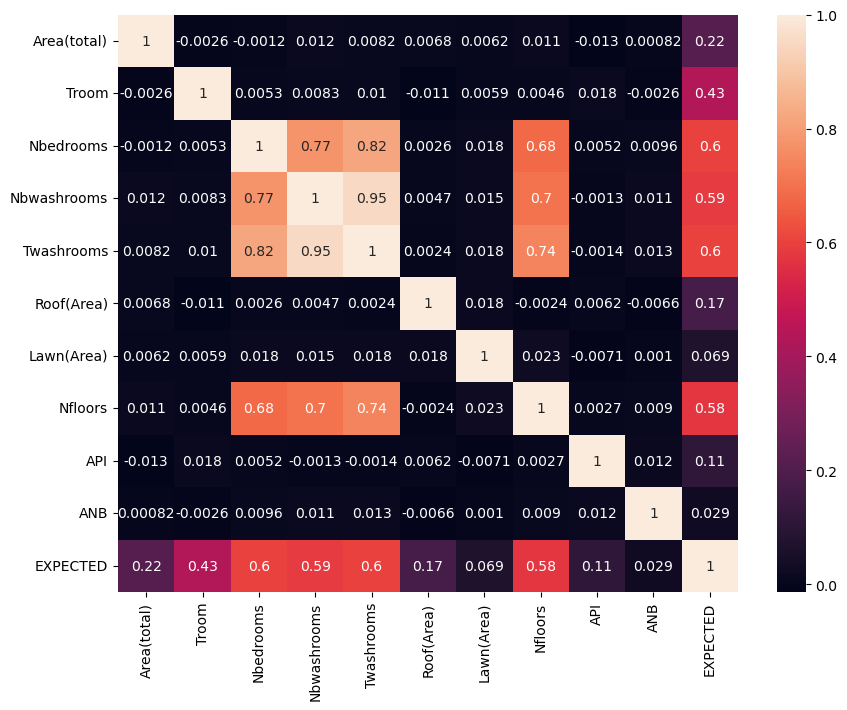

In [45]:
plt.figure(figsize=(10, 7.5))
sns.heatmap(concat_df.drop('id',axis=1).corr(numeric_only=True),annot=True)

<Figure size 2000x2000 with 0 Axes>

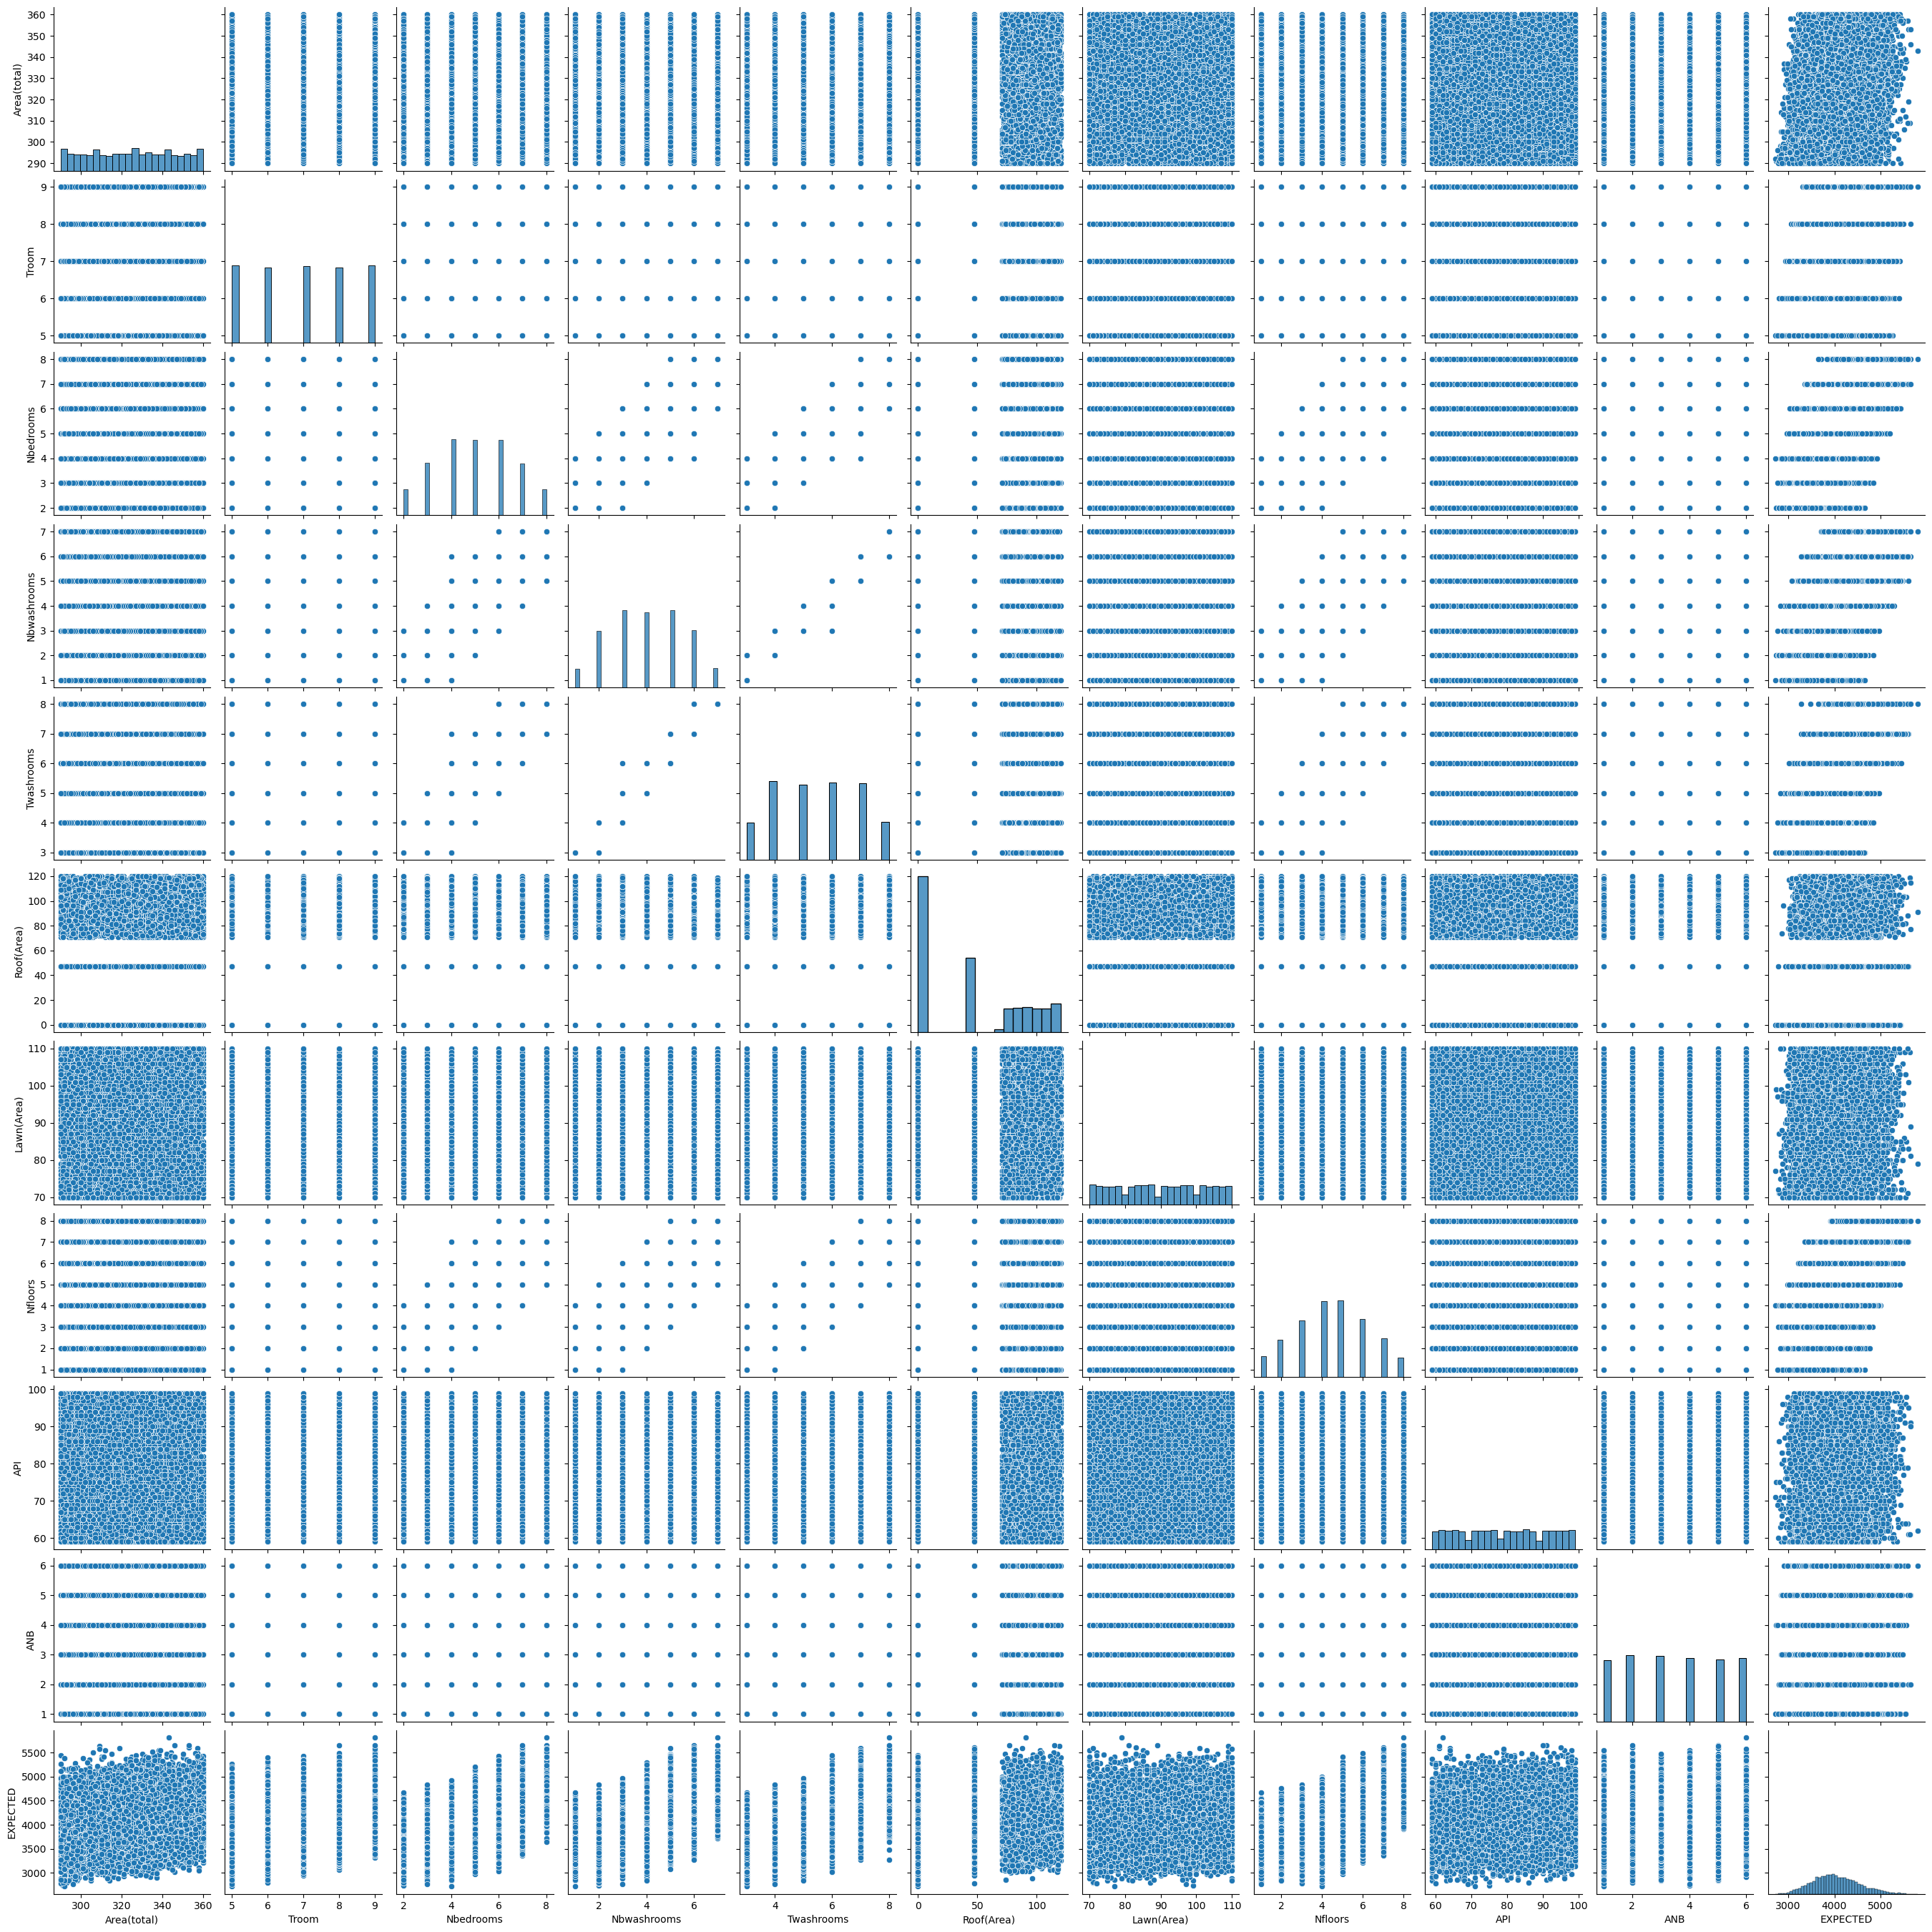

In [46]:
plt.figure(figsize=(20, 20))
sns.pairplot(concat_df.drop('id',axis=1))

In [47]:
concat_df.drop('Nbwashrooms',axis=1,inplace=True)

Now that we have cleaned the data, we will visualise the relationship between the dependent variable and different independent variables

In [48]:
train_data = concat_df[concat_df.Grade!='test']

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7000 non-null   int64  
 1   Area(total)  7000 non-null   int64  
 2   Troom        7000 non-null   float64
 3   Nbedrooms    7000 non-null   float64
 4   Twashrooms   7000 non-null   float64
 5   roof         7000 non-null   object 
 6   Roof(Area)   7000 non-null   float64
 7   Lawn(Area)   7000 non-null   float64
 8   Nfloors      7000 non-null   int64  
 9   API          7000 non-null   float64
 10  ANB          7000 non-null   int64  
 11  Grade        7000 non-null   object 
 12  EXPECTED     7000 non-null   float64
dtypes: float64(7), int64(4), object(2)
memory usage: 765.6+ KB


In [50]:
test_data = concat_df[concat_df.Grade=='test'].drop('Grade',axis=1)

In [51]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299 entries, 0 to 3298
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3299 non-null   int64  
 1   Area(total)  3299 non-null   int64  
 2   Troom        3299 non-null   float64
 3   Nbedrooms    3299 non-null   float64
 4   Twashrooms   3299 non-null   float64
 5   roof         3299 non-null   object 
 6   Roof(Area)   3299 non-null   float64
 7   Lawn(Area)   3299 non-null   float64
 8   Nfloors      3299 non-null   int64  
 9   API          3299 non-null   float64
 10  ANB          3299 non-null   int64  
 11  EXPECTED     3299 non-null   float64
dtypes: float64(7), int64(4), object(1)
memory usage: 335.1+ KB


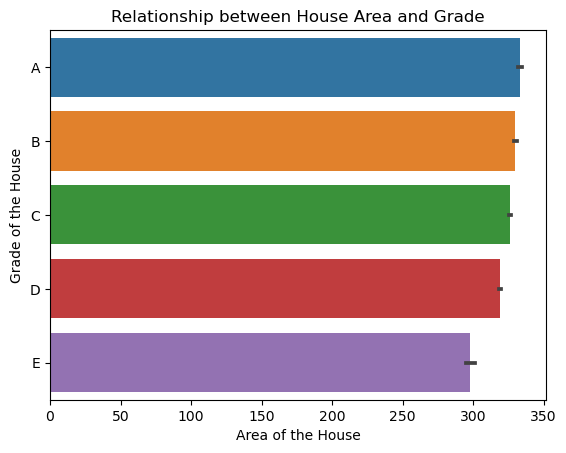

In [52]:
sns.barplot(x='Area(total)', y='Grade', data=train_data, order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between House Area and Grade')
plt.xlabel('Area of the House')
plt.ylabel('Grade of the House')
plt.show()

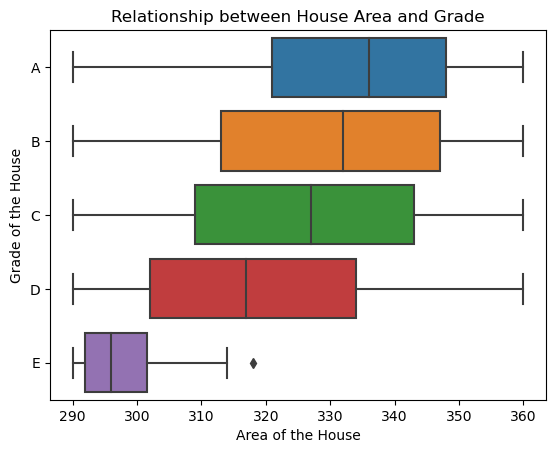

In [53]:
sns.boxplot(x='Area(total)', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between House Area and Grade')
plt.xlabel('Area of the House')
plt.ylabel('Grade of the House')
plt.show()

This suggests a positive correlation between the area of the house and the grade.This relationship could imply that larger houses might have more desirable features or amenities, leading to a higher valuation.

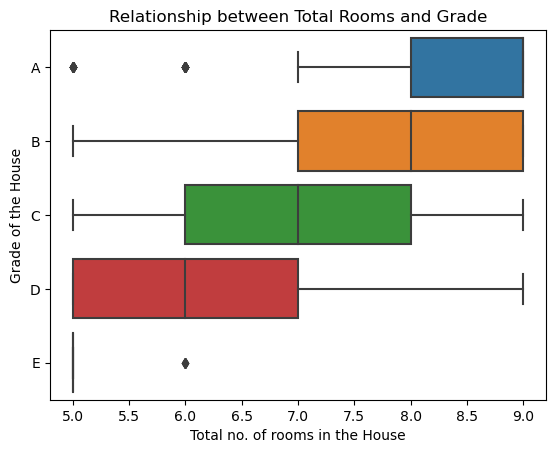

In [54]:
sns.boxplot(x='Troom', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Total Rooms and Grade')
plt.xlabel('Total no. of rooms in the House')
plt.ylabel('Grade of the House')
plt.show()

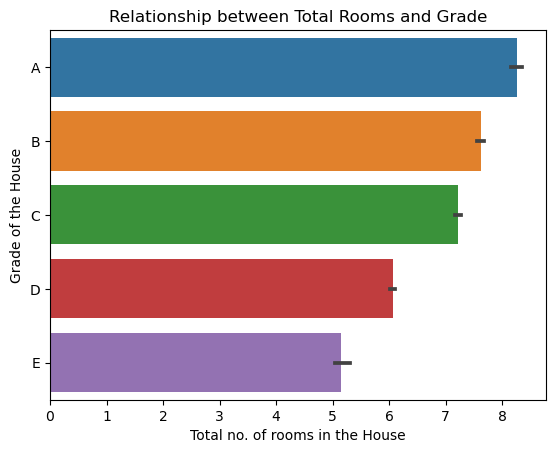

In [55]:
sns.barplot(x='Troom', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Total Rooms and Grade')
plt.xlabel('Total no. of rooms in the House')
plt.ylabel('Grade of the House')
plt.show()

This checks out for the same reason as before

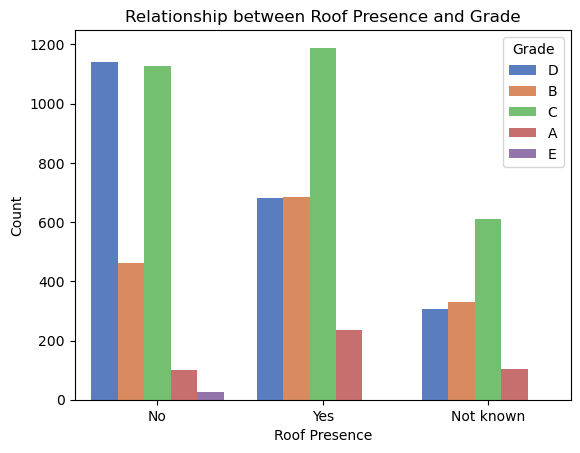

In [56]:
sns.countplot(x='roof', hue='Grade', data=train_data, palette='muted')

plt.title('Relationship between Roof Presence and Grade')
plt.xlabel('Roof Presence')
plt.ylabel('Count')
plt.show()

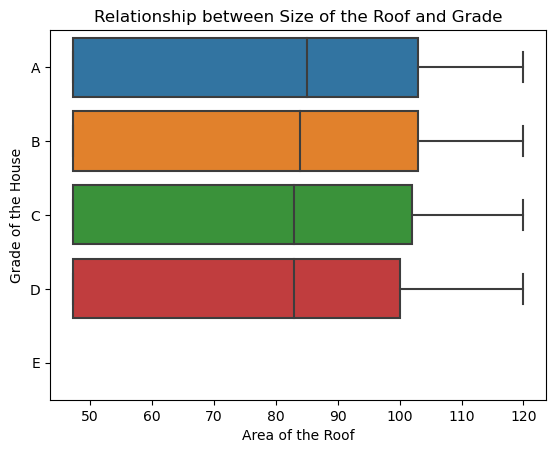

In [57]:
sns.boxplot(x='Roof(Area)', y='Grade', data=train_data[train_data['Roof(Area)']!=0.0],order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Size of the Roof and Grade')
plt.xlabel('Area of the Roof')
plt.ylabel('Grade of the House')
plt.show()

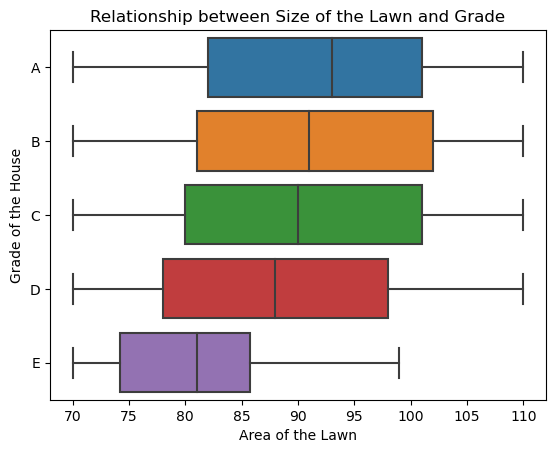

In [58]:
sns.boxplot(x='Lawn(Area)', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Size of the Lawn and Grade')
plt.xlabel('Area of the Lawn')
plt.ylabel('Grade of the House')
plt.show()

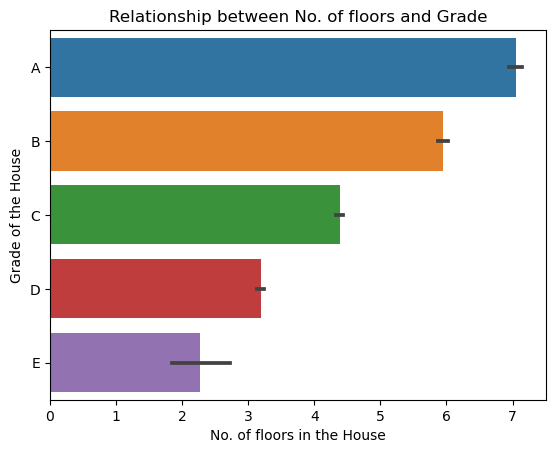

In [59]:
sns.barplot(x='Nfloors', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between No. of floors and Grade')
plt.xlabel('No. of floors in the House')
plt.ylabel('Grade of the House')
plt.show()

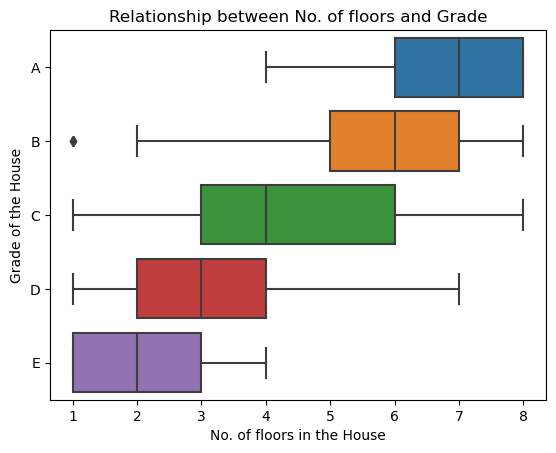

In [60]:
sns.boxplot(x='Nfloors', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between No. of floors and Grade')
plt.xlabel('No. of floors in the House')
plt.ylabel('Grade of the House')
plt.show()

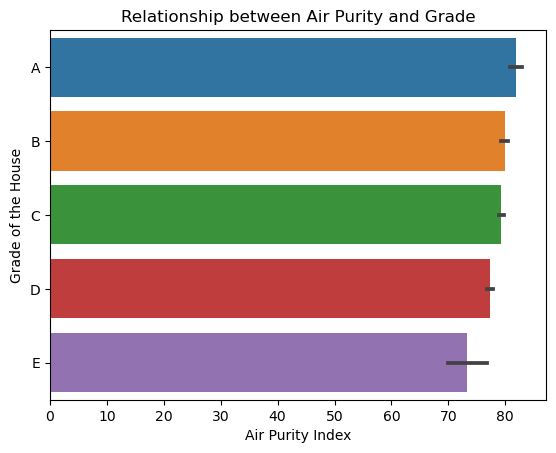

In [61]:
sns.barplot(x='API', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Air Purity and Grade')
plt.xlabel('Air Purity Index')
plt.ylabel('Grade of the House')
plt.show()

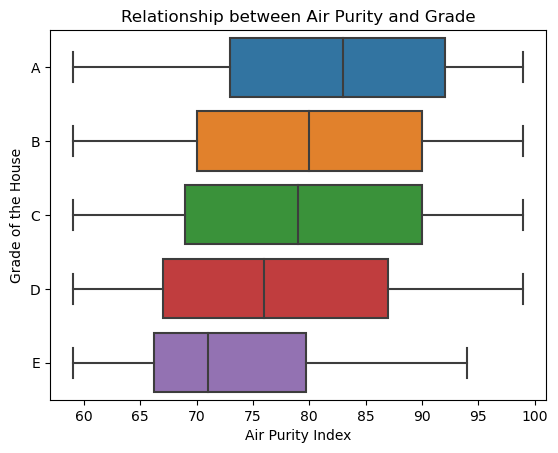

In [62]:
sns.boxplot(x='API', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Air Purity and Grade')
plt.xlabel('Air Purity Index')
plt.ylabel('Grade of the House')
plt.show()

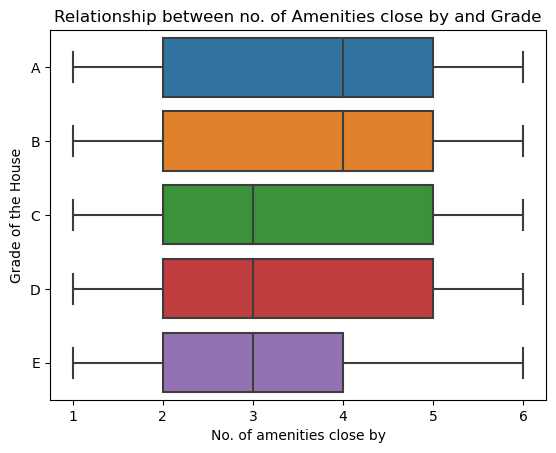

In [63]:
sns.boxplot(x='ANB', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between no. of Amenities close by and Grade')
plt.xlabel('No. of amenities close by')
plt.ylabel('Grade of the House')
plt.show()

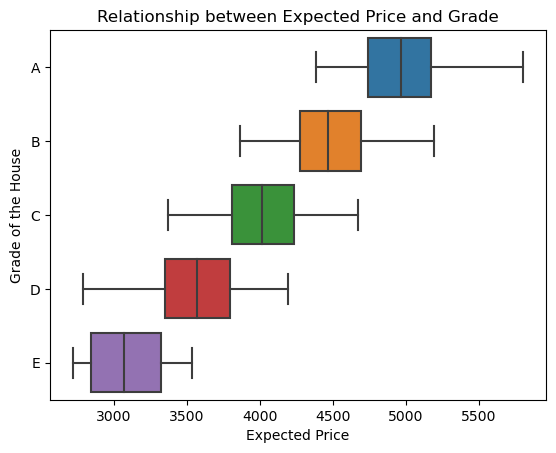

In [64]:
sns.boxplot(x='EXPECTED', y='Grade', data=train_data,order=['A', 'B', 'C', 'D', 'E'])

plt.title('Relationship between Expected Price and Grade')
plt.xlabel('Expected Price')
plt.ylabel('Grade of the House')
plt.show()

After the looking at the relationships, we now understand that, there might be a positive correlationbetween the grade and the size of the house (the number of rooms, number of washrooms, no. of floors etc.), Expected Price, API etc 

In [65]:
from scipy.stats import f_oneway

In [66]:
grade_A = train_data[train_data.Grade=='A']
grade_B = train_data[train_data.Grade=='B']
grade_C = train_data[train_data.Grade=='C']
grade_D = train_data[train_data.Grade=='D']
grade_E = train_data[train_data.Grade=='E']

Null Hypothesis : There is no significant relationship between API and Grade

In [67]:
f_oneway(grade_A.API,grade_B.API,grade_C.API,grade_D.API,grade_E.API)

F_onewayResult(statistic=21.920238783250937, pvalue=5.3094016537447315e-18)

Meaning, we can reject NULL here

Before we can build the models, we need to scale and encode the data

In [68]:
test_data['Grade']='test'

In [69]:
combine_data = pd.concat([train_data,test_data],axis=0)

In [70]:
combine_data

,id,Area(total),Troom,Nbedrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,305,8.0,2.0,3.0,No,0.000000,76.0,2,63.0,4,D,3826.0
1,2,344,6.0,7.0,8.0,No,0.000000,83.0,7,97.0,1,B,4458.0
2,3,294,8.0,4.0,4.0,Yes,97.000000,78.0,1,88.0,4,C,4199.0
3,4,328,5.0,4.0,4.0,No,0.000000,91.0,5,86.0,1,D,3462.0
4,5,295,9.0,5.0,5.0,Not known,47.223321,97.0,4,93.0,3,C,4543.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,349,7.0,3.0,4.0,Not known,47.223321,100.0,5,89.0,4,test,3858.0
3295,3296,338,7.0,3.0,4.0,No,0.000000,87.0,3,75.0,6,test,3714.0
3296,3297,307,8.0,4.0,6.0,Yes,88.000000,88.0,4,83.0,6,test,3824.0
3297,3298,352,5.0,3.0,5.0,Yes,88.000000,100.0,2,99.0,4,test,3533.0


In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
continuous_columns = ['Area(total)','Roof(Area)','Lawn(Area)','API','EXPECTED']

In [73]:
scaler = StandardScaler()
combine_data[continuous_columns] = scaler.fit_transform(combine_data[continuous_columns])

In [74]:
combine_data

,id,Area(total),Troom,Nbedrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED
0,1,-0.976671,8.0,2.0,3.0,No,-1.077416,-1.185348,2,-1.354073,4,D,-0.419853
1,2,0.927560,6.0,7.0,8.0,No,-1.077416,-0.593229,7,1.518119,1,B,0.861792
2,3,-1.513762,8.0,4.0,4.0,Yes,1.135672,-1.016171,1,0.757833,4,C,0.336561
3,4,0.146337,5.0,4.0,4.0,No,-1.077416,0.083479,5,0.588881,1,D,-1.158016
4,5,-1.464936,9.0,5.0,5.0,Not known,0.000000,0.591011,4,1.180214,3,C,1.034165
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,1.171693,7.0,3.0,4.0,Not known,0.000000,0.844776,5,0.842309,4,test,-0.354960
3295,3296,0.634602,7.0,3.0,4.0,No,-1.077416,-0.254875,3,-0.340358,6,test,-0.646980
3296,3297,-0.879018,8.0,4.0,6.0,Yes,0.930334,-0.170286,4,0.335452,6,test,-0.423909
3297,3298,1.318172,5.0,3.0,5.0,Yes,0.930334,0.844776,2,1.687072,4,test,-1.014034


In [75]:
replacement_dict = {'No':0,'Yes':1}
combine_data['roof'] = combine_data['roof'].replace(replacement_dict)

In [76]:
combine_data['roof_unknown'] = (combine_data['roof'] == 'Not known').astype(int)

In [77]:
combine_data['roof'] = combine_data['roof'].replace('Not known',0)

In [78]:
combine_data

,id,Area(total),Troom,Nbedrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED,roof_unknown
0,1,-0.976671,8.0,2.0,3.0,0,-1.077416,-1.185348,2,-1.354073,4,D,-0.419853,0
1,2,0.927560,6.0,7.0,8.0,0,-1.077416,-0.593229,7,1.518119,1,B,0.861792,0
2,3,-1.513762,8.0,4.0,4.0,1,1.135672,-1.016171,1,0.757833,4,C,0.336561,0
3,4,0.146337,5.0,4.0,4.0,0,-1.077416,0.083479,5,0.588881,1,D,-1.158016,0
4,5,-1.464936,9.0,5.0,5.0,0,0.000000,0.591011,4,1.180214,3,C,1.034165,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3294,3295,1.171693,7.0,3.0,4.0,0,0.000000,0.844776,5,0.842309,4,test,-0.354960,1
3295,3296,0.634602,7.0,3.0,4.0,0,-1.077416,-0.254875,3,-0.340358,6,test,-0.646980,0
3296,3297,-0.879018,8.0,4.0,6.0,1,0.930334,-0.170286,4,0.335452,6,test,-0.423909,0
3297,3298,1.318172,5.0,3.0,5.0,1,0.930334,0.844776,2,1.687072,4,test,-1.014034,0


In [79]:
replacement_dict = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1}
combine_data['Grade'] = combine_data['Grade'].replace(replacement_dict)

In [80]:
combine_data.drop('id',axis=1,inplace=True)

In [81]:
train_data=combine_data[combine_data.Grade!='test']
test_data=(combine_data[combine_data.Grade=='test']).drop('Grade',axis=1)

We need to make a validation set to test our models before we can predict on the test data

In [82]:
train_data

,Area(total),Troom,Nbedrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Grade,EXPECTED,roof_unknown
0,-0.976671,8.0,2.0,3.0,0,-1.077416,-1.185348,2,-1.354073,4,2,-0.419853,0
1,0.927560,6.0,7.0,8.0,0,-1.077416,-0.593229,7,1.518119,1,4,0.861792,0
2,-1.513762,8.0,4.0,4.0,1,1.135672,-1.016171,1,0.757833,4,3,0.336561,0
3,0.146337,5.0,4.0,4.0,0,-1.077416,0.083479,5,0.588881,1,2,-1.158016,0
4,-1.464936,9.0,5.0,5.0,0,0.000000,0.591011,4,1.180214,3,3,1.034165,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.927845,8.0,2.0,3.0,0,0.000000,-1.016171,1,-0.509310,5,2,-0.640896,1
6996,0.781081,5.0,3.0,4.0,1,1.204118,-1.523702,4,-0.255882,4,2,-1.407450,0
6997,-0.927845,6.0,4.0,4.0,1,0.816257,-0.846994,4,1.433643,4,2,-0.413770,0
6998,0.634602,8.0,7.0,7.0,0,-1.077416,0.421833,4,0.419928,1,4,0.922629,0


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Grade',axis=1), train_data.Grade, test_size=0.2, random_state=42)

In [85]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=3000,class_weight='balanced')

In [88]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=3000,
                   multi_class='multinomial')

In [89]:
lr.score(X_train,y_train)

0.8825

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
np.mean(cross_val_score(lr,X_train,y_train,cv=5))

0.8773214285714286

In [92]:
y_pred = lr.predict(X_test)

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         5
           2       0.91      0.93      0.92       419
           3       0.92      0.84      0.88       586
           4       0.80      0.88      0.84       296
           5       0.83      0.90      0.87        94

    accuracy                           0.88      1400
   macro avg       0.79      0.91      0.83      1400
weighted avg       0.88      0.88      0.88      1400



In [95]:
lr_test_pred = lr.predict(test_data)

In [96]:
lr_test_pred=pd.DataFrame(lr_test_pred)

In [97]:
submission_df.Grade=lr_test_pred

In [98]:
submission_df.Grade = submission_df.Grade.replace({5:'A',4:'B',3:'C',2:'D',1:'E'})

In [99]:
submission_df.to_csv('lr.csv',index=False)

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt = DecisionTreeClassifier(class_weight='balanced',max_depth=8)

In [102]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8)

In [103]:
dt.score(X_train,y_train)

0.8198214285714286

In [104]:
np.mean(cross_val_score(dt,X_train,y_train,cv=5))

0.7558928571428571

In [105]:
y_pred = dt.predict(X_test)

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.38      0.60      0.46         5
           2       0.80      0.87      0.83       419
           3       0.82      0.71      0.76       586
           4       0.67      0.72      0.70       296
           5       0.62      0.76      0.68        94

    accuracy                           0.76      1400
   macro avg       0.66      0.73      0.69      1400
weighted avg       0.77      0.76      0.76      1400



In [107]:
dt_test_pred = dt.predict(test_data)

In [108]:
dt_test_pred=pd.DataFrame(dt_test_pred)

In [109]:
submission_df.Grade=dt_test_pred

In [110]:
submission_df.Grade = submission_df.Grade.replace({5:'A',4:'B',3:'C',2:'D',1:'E'})

In [111]:
submission_df.to_csv('dt.csv',index=False)

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf = RandomForestClassifier(n_estimators=2000,class_weight='balanced',max_depth=10)

In [114]:
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=2000)

In [115]:
rf.score(X_train,y_train)

0.9675

In [116]:
np.mean(cross_val_score(rf,X_train,y_train,cv=5))

0.8649999999999999

In [117]:
y_pred = rf.predict(X_test)

In [118]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.40      1.00      0.57         2
           2       0.92      0.91      0.91       421
           3       0.87      0.88      0.88       578
           4       0.85      0.80      0.82       316
           5       0.77      0.87      0.81        83

    accuracy                           0.87      1400
   macro avg       0.76      0.89      0.80      1400
weighted avg       0.87      0.87      0.87      1400



In [119]:
rf_test_pred = rf.predict(test_data)

In [120]:
submission_df.Grade=pd.DataFrame(rf_test_pred)

In [121]:
submission_df.Grade = submission_df.Grade.replace({5:'A',4:'B',3:'C',2:'D',1:'E'})

In [122]:
submission_df.to_csv('rf.csv',index=False)

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn = KNeighborsClassifier(n_neighbors=9)

In [125]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [126]:
knn.score(X_train,y_train)

0.8944642857142857

In [127]:
np.mean(cross_val_score(knn,X_train,y_train,cv=5))

0.8551785714285713

In [128]:
y_pred = knn.predict(X_test)

In [129]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.90      0.91      0.91       419
           3       0.85      0.90      0.87       586
           4       0.82      0.77      0.80       296
           5       0.88      0.70      0.78        94

    accuracy                           0.86      1400
   macro avg       0.69      0.66      0.67      1400
weighted avg       0.86      0.86      0.86      1400



C:\Users\pumpkin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pumpkin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pumpkin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
knn_test_pred = knn.predict(test_data)

In [131]:
submission_df.Grade=pd.DataFrame(knn_test_pred)

In [132]:
submission_df.Grade = submission_df.Grade.replace({5:'A',4:'B',3:'C',2:'D',1:'E'})

In [133]:
submission_df.to_csv('knn.csv',index=False)

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
gb = GradientBoostingClassifier()

In [136]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [137]:
gb.score(X_train,y_train)

0.9414285714285714

In [138]:
np.mean(cross_val_score(gb,X_train,y_train,cv=5))

0.8887499999999999

In [139]:
y_pred = gb.predict(X_test)

In [140]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.20      0.50      0.29         2
           2       0.90      0.93      0.92       407
           3       0.92      0.87      0.90       620
           4       0.82      0.83      0.83       292
           5       0.70      0.84      0.76        79

    accuracy                           0.88      1400
   macro avg       0.71      0.79      0.74      1400
weighted avg       0.88      0.88      0.88      1400



In [141]:
gb_test_pred = gb.predict(test_data)

In [142]:
submission_df.Grade=pd.DataFrame(gb_test_pred)

In [143]:
submission_df.Grade = submission_df.Grade.replace({5:'A',4:'B',3:'C',2:'D',1:'E'})

In [144]:
submission_df.to_csv('gb.csv',index=False)

In [145]:
from sklearn.svm import SVC

In [146]:
sv = SVC()

In [147]:
sv.fit(X_train,y_train)

SVC()

In [148]:
sv.score(X_train,y_train)

0.9289285714285714

In [149]:
np.mean(cross_val_score(sv,X_train,y_train,cv=5))

0.91625

In [150]:
y_pred = sv.predict(X_test)

In [151]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.97      0.96      0.96       423
           3       0.95      0.93      0.94       596
           4       0.89      0.86      0.88       306
           5       0.74      0.93      0.83        75

    accuracy                           0.92      1400
   macro avg       0.71      0.74      0.72      1400
weighted avg       0.93      0.92      0.93      1400



C:\Users\pumpkin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pumpkin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pumpkin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
sv_test_pred = sv.predict(test_data)

In [153]:
submission_df.Grade=pd.DataFrame(sv_test_pred)

In [154]:
submission_df.Grade = submission_df.Grade.replace({5:'A',4:'B',3:'C',2:'D',1:'E'})

In [155]:
submission_df.to_csv('sv.csv',index=False)